# Data Cleaning and Exploration - New York School Data


In this project, I will be looking at public datasets that detail SAT scores and demographics for New York City schools. The goals of this project will be to:
- Clean the data by identifying and dealing with missing, irregular, unnecessary, and/or inconsistent data.
- Explore the data.
- Perform some basic analysis on the data to see how SAT scores relate to student demographics.

#### Imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

## Clean the Data 

### SAT Data 

In [666]:
# read the data
sat = pd.read_csv('sat_ny.csv')
sat.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [667]:
#get number of rows
sat_rows = sat.shape[0]
sat_rows

478

In [668]:
#get data types/column names
sat_types = sat.dtypes
sat_types

DBN                                object
SCHOOL NAME                        object
Num of SAT Test Takers             object
SAT Critical Reading Avg. Score    object
SAT Math Avg. Score                object
SAT Writing Avg. Score             object
dtype: object

### Detect whether or not dataset has any missing values

In [669]:
#there are no missing values
sat_cols = list(sat.columns)
for c in sat_cols:
    print(c + ': ' + str(sat[c].isnull().values.any()))

DBN: False
SCHOOL NAME: False
Num of SAT Test Takers: False
SAT Critical Reading Avg. Score: False
SAT Math Avg. Score: False
SAT Writing Avg. Score: False


In [1117]:
# get all the school DBNs (unique identifiers) for the schools in the SAT data
sat_dbns = list(sat['DBN'])
sat_codes = []
for dbn in sat_dbns:
    code = dbn[2:]
    sat_codes.append(code)

Instead of being listed as null, suppressed data points are marked by 's.' These rows will be left in for now.

SAT Scores are also most commonly expressed as a composite score. I will thus create a new column that adds up the scores from each column. Additionally, I will edit the subject scores to be expressed in ranges that correspond with the percentiles from 2012 as seen below:

Reading
* 90-99th percentile: [650, 800]
* 71st-88th percentile: [560, 640]
* 51st-67th percentile: [500, 550]
* 21st-48th percentile: [410, 490]
* below 20th percentile: [200, 400]

Math
* 90-99th percentile: [680, 800]
* 70-89th percentile: [580, 670]
* 52nd-67th percentile: [520, 570]
* 21st-49th percentile: [420, 510]
* below 20th percentile: [200, 410]

Writing
* 90-99th percentile: [650, 800]
* 70-89th percentile: [550, 640]
* 52nd-67th percentile: [490, 540]
* 21st-48th percentile: [400, 480]
* below 20th percentile: [200, 390]

Composite
* 90-99th percentile: [1930, 2400]
* 70-89th percentile: [1670, 1920]
* 50-69th percentile: [1490, 1660]
* 20-49th percentile: [1230, 1480]
* below 20th percentile: [600, 1220]

In [673]:
def r_range(r):
    if 650 <= r <= 800:
        return '650-800'
    elif 560 <= r <= 649:
        return '560-640'
    elif 500 <= r <= 559:
        return '500-550'
    elif 410 <= r <= 499:
        return '410-490'
    else:
        return '200-400'
def m_range(m):
    if 680 <= m <= 800:
        return '680-800'
    elif 580 <= m <= 679:
        return '580-670'
    elif 520 <= m <= 579:
        return '520-570'
    elif 420 <= m <= 519:
        return '420-510'
    else:
        return '200-410'
def w_range(w):
    if 650 <= w <= 800:
        return '650-800'
    elif 550 <= w <= 649:
        return '550-640'
    elif 490 <= w <= 549:
        return '490-550'
    elif 400 <= w <= 489:
        return '400-480'
    else:
        return '200-390'
def c_range(c):
    if 1930 <= c <= 2400:
        return '1930-2400'
    elif 1670 <= c <= 1929:
        return '1670-1920'
    elif 1490 <= c <= 1669:
        return '1490-1660'
    elif 1230 <= c <= 1489:
        return '1230-1480'
    else:
        return '600-1220'

In [674]:
composites = []
composites_raw = []
r_ranges = []
m_ranges = []
w_ranges = []
for i, row in sat.iterrows():
    n = row['Num of SAT Test Takers']
    if n == 's':
        composites.append('s')
        r_ranges.append('s')
        m_ranges.append('s')
        w_ranges.append('s')
        composites_raw.append('s')
        continue
    r = int(row['SAT Critical Reading Avg. Score'])
    m = int(row['SAT Math Avg. Score'])
    w = int(row['SAT Writing Avg. Score'])
    c = r+m+w
    composites_raw.append(c)
    composites.append(c_range(c))
    r_ranges.append(r_range(r))
    m_ranges.append(m_range(m))
    w_ranges.append(w_range(w))

In [676]:
sat = sat.drop(columns=['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score'])

In [677]:
sat.insert(3, 'SAT Composite Avg. Score', composites)
sat.insert(4, 'SAT Critical Reading Avg. Score', r_ranges)
sat.insert(5, 'SAT Math Avg. Score', m_ranges)
sat.insert(6, 'SAT Writing Avg. Score', w_ranges)
sat.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Composite Avg. Score,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,600-1220,200-400,200-410,200-390
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,600-1220,200-400,420-510,200-390
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,600-1220,200-400,200-410,200-390
3,01M458,FORSYTH SATELLITE ACADEMY,7,600-1220,410-490,200-410,200-390
4,01M509,MARTA VALLE HIGH SCHOOL,44,600-1220,200-400,420-510,200-390


### Demographics Data 

In [260]:
demos = pd.read_csv('demographics_ny.csv')
demos.head(6)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113.0,55.7,90.0,44.3


Notes on the columns:
* fl_percent is percent of students who speak foreign language (presumably percent of students who speak English as a second language)
* frl_percent is percent of students under the National School Lunch Program. These students receive free or reduced-price lunches and are from low income households.
* sped_num and sped_percent are measures of how many special ed students there are

I will focus on columns that reveal information about students' ethnicity, socioeconomic situation, and gender. All other columns will thus be removed. Additionally, I will only focus on the most recent school years (2011-2012).

In [261]:
demos_cols_og = list(demos.columns)
grades = demos_cols_og[6:20]

In [262]:
demos = demos.drop(columns=grades)
demos = demos.drop(columns=['fl_percent', 'ctt_num', 'selfcontained_num'])
demos.head()

,DBN,Name,schoolyear,frl_percent,total_enrollment,ell_num,ell_percent,sped_num,sped_percent,asian_num,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,NaN,281,36.0,12.8,57.0,20.3,10,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,NaN,243,38.0,15.6,55.0,22.6,18,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,NaN,261,52.0,19.9,60.0,23.0,16,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,NaN,252,48.0,19.0,62.0,24.6,16,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,96.5,208,40.0,19.2,46.0,22.1,16,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [263]:
demos_types = demos.dtypes
demos_types

DBN                  object
Name                 object
schoolyear            int64
frl_percent         float64
total_enrollment      int64
ell_num             float64
ell_percent         float64
sped_num            float64
sped_percent        float64
asian_num             int64
asian_per           float64
black_num             int64
black_per           float64
hispanic_num          int64
hispanic_per        float64
white_num             int64
white_per           float64
male_num            float64
male_per            float64
female_num          float64
female_per          float64
dtype: object

In [264]:
demos = demos.loc[demos['schoolyear'] == 20112012]
demos.head()

,DBN,Name,schoolyear,frl_percent,total_enrollment,ell_num,ell_percent,sped_num,sped_percent,asian_num,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,89.4,189,20.0,10.6,40.0,21.2,12,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,61.5,328,33.0,10.1,59.0,18.0,51,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,92.5,626,128.0,20.4,97.0,15.5,190,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,99.7,401,34.0,8.5,106.0,26.4,22,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,78.9,176,6.0,3.4,45.0,25.6,9,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


#### Detect and Handle Missing Data 

In [265]:
demos_cols = list(demos.columns)
for c in demos_cols:
    print(c + ': ' + str(demos[c].isnull().values.any()))

DBN: False
Name: False
schoolyear: False
frl_percent: False
total_enrollment: False
ell_num: False
ell_percent: False
sped_num: False
sped_percent: False
asian_num: False
asian_per: False
black_num: False
black_per: False
hispanic_num: False
hispanic_per: False
white_num: False
white_per: False
male_num: False
male_per: False
female_num: False
female_per: False


Since no null values were detected for the information expressed in both percentages and numbers, I will only keep the percentage columns

In [266]:
demos = demos.drop(columns=['schoolyear','ell_num', 'sped_num', 'asian_num', 'black_num', 'hispanic_num', 'white_num', 'male_num', 'female_num'])
demos = demos.reset_index(drop=True)
demos.head()

,DBN,Name,frl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,89.4,189,10.6,21.2,6.3,33.3,57.7,2.1,51.3,48.7
1,01M019,P.S. 019 ASHER LEVY,61.5,328,10.1,18.0,15.5,24.7,48.2,8.5,44.8,55.2
2,01M020,PS 020 ANNA SILVER,92.5,626,20.4,15.5,30.4,8.8,57.0,2.6,52.7,47.3
3,01M034,PS 034 FRANKLIN D ROOSEVELT,99.7,401,8.5,26.4,5.5,22.4,68.6,2.0,50.9,49.1
4,01M063,PS 063 WILLIAM MCKINLEY,78.9,176,3.4,25.6,5.1,23.3,62.5,8.5,55.1,44.9


In [284]:
#remove rows for schools not present in the SAT data
for i, row in demos.iterrows():
    dbn = row['DBN']
    if dbn not in sat_dbns:
        demos = demos.drop(index = i)
demos = demos.reset_index(drop=True)
demos.head()

,DBN,Name,frl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,88.6,422,22.3,24.9,14.0,29.1,53.8,1.7,61.4,38.6
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,71.8,394,21.1,21.8,29.2,22.6,45.9,2.3,57.4,42.6
2,01M450,EAST SIDE COMMUNITY HIGH SCHOOL,71.8,598,5.0,26.4,9.7,23.9,55.4,10.4,54.7,45.3
3,01M458,SATELLITE ACADEMY HS @ FORSYTHE STREET,72.8,224,4.0,8.9,2.2,34.4,59.4,3.6,43.3,56.7
4,01M509,MARTA VALLE SECONDARY SCHOOL,80.7,367,11.2,25.9,9.3,31.6,56.9,1.6,46.3,53.7


In [285]:
#ensure there is no missing data
demos_cols = list(demos.columns)
for c in demos_cols:
    print(c + ': ' + str(demos[c].isnull().values.any()))

DBN: False
Name: False
frl_percent: False
total_enrollment: False
ell_percent: False
sped_percent: False
asian_per: False
black_per: False
hispanic_per: False
white_per: False
male_per: False
female_per: False


## Combining the Data 

In [681]:
sat_demos = pd.merge(sat, demos, on='DBN', how='outer')
sat_demos = sat_demos.drop(columns=['Name'])
sat_demos.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Raw Composite Avg. Score,SAT Composite Avg. Score,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,frl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,1122,600-1220,200-400,200-410,200-390,88.6,422.0,22.3,24.9,14.0,29.1,53.8,1.7,61.4,38.6
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,1172,600-1220,200-400,420-510,200-390,71.8,394.0,21.1,21.8,29.2,22.6,45.9,2.3,57.4,42.6
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,1149,600-1220,200-400,200-410,200-390,71.8,598.0,5.0,26.4,9.7,23.9,55.4,10.4,54.7,45.3
3,01M458,FORSYTH SATELLITE ACADEMY,7,1174,600-1220,410-490,200-410,200-390,72.8,224.0,4.0,8.9,2.2,34.4,59.4,3.6,43.3,56.7
4,01M509,MARTA VALLE HIGH SCHOOL,44,1207,600-1220,200-400,420-510,200-390,80.7,367.0,11.2,25.9,9.3,31.6,56.9,1.6,46.3,53.7


In [558]:
sat_demos_rows = sat_demos.shape[0]
sat_rows = sat.shape[0]
demos_rows = demos.shape[0]
sat_rows, demos_rows, sat_demos_rows

(478, 450, 478)

Schools with suppressed SAT data can demonstrate something valuable. But, if any school's demographics data is missing, we cannot perform the analysis necessary. Thus, all rows with missing demographic data will be dropped

In [559]:
dem_titles = demos_cols[2:]
dem_titles

['frl_percent',
 'total_enrollment',
 'ell_percent',
 'sped_percent',
 'asian_per',
 'black_per',
 'hispanic_per',
 'white_per',
 'male_per',
 'female_per']

In [560]:
for i, row in sat_demos.iterrows():
    dems = []
    for c in dem_titles:
        dems.append(np.isnan(row[c]))
    if all(dems):
        sat_demos = sat_demos.drop(index = i)

To streamline analysis, a column storing percentage of students enrolled who took the SAT will replace the 'Num of SAT Test Takers' and 'total_enrollment' columns. The percentage is calculated by dividing the figures in 'Num of SAT Test Takers' by those in 'total_enrollment.' For rows that have supressed SAT data, 0 will be inputted

In [682]:
percent_takers = []
for i, row in sat_demos.iterrows():
    n = row['Num of SAT Test Takers']
    enrolled = row['total_enrollment']
    if n == 's':
        percent_takers.append(0)
        continue
    percent = round((int(n) / enrolled) * 100, 1)
    percent_takers.append(percent)

In [562]:
sat_demos = sat_demos.drop(columns=['Num of SAT Test Takers', 'total_enrollment'])
sat_demos.insert(2, 'Percent of Students Enrolled Who Took SAT', percent_takers)

### Visualizing SAT Scores and Demographics 

In [563]:
sat_demos.head()

,DBN,SCHOOL NAME,Percent of Students Enrolled Who Took SAT,SAT Composite Avg. Score,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,frl_percent,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,6.9,600-1220,200-400,200-410,200-390,88.6,22.3,24.9,14.0,29.1,53.8,1.7,61.4,38.6
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,23.1,600-1220,200-400,420-510,200-390,71.8,21.1,21.8,29.2,22.6,45.9,2.3,57.4,42.6
2,01M450,EAST SIDE COMMUNITY SCHOOL,11.7,600-1220,200-400,200-410,200-390,71.8,5.0,26.4,9.7,23.9,55.4,10.4,54.7,45.3
3,01M458,FORSYTH SATELLITE ACADEMY,3.1,600-1220,410-490,200-410,200-390,72.8,4.0,8.9,2.2,34.4,59.4,3.6,43.3,56.7
4,01M509,MARTA VALLE HIGH SCHOOL,12.0,600-1220,200-400,420-510,200-390,80.7,11.2,25.9,9.3,31.6,56.9,1.6,46.3,53.7


For this analysis, I will be primarily looking at socioeconmic and ethnic figures. Thus, the demographics data not relating to these figures will be dropped.

#### Now that all the data in this dataframe has been cleaned/streamlined, let's look at how the school demographics average out when grouped by the different SAT score ranges

### SAT Composite Scores & Ethnicity

In [565]:
sat_demos.groupby('SAT Composite Avg. Score').mean()

,Percent of Students Enrolled Who Took SAT,frl_percent,asian_per,black_per,hispanic_per,white_per
SAT Composite Avg. Score,,,,,,
1230-1480,15.561616,58.788889,15.155556,30.388889,39.389899,14.204040
1490-1660,18.084615,35.076923,26.130769,16.892308,20.930769,33.876923
1670-1920,22.781818,26.690909,33.645455,12.318182,15.363636,36.854545
1930-2400,23.366667,27.166667,55.800000,1.933333,4.966667,36.800000
600-1220,12.617483,71.985664,5.318182,44.601399,46.536713,2.851399
s,0.000000,70.865789,9.036842,33.213158,50.044737,6.878947


The bar plot below demonstrates the average ethnic distributions of schools for each SAT composite score range.

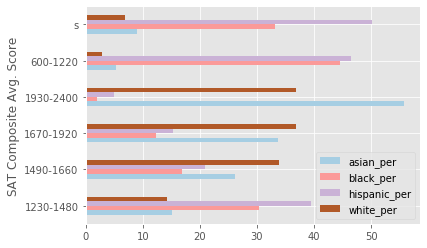

In [566]:
composite_eth = sat_demos.drop(columns=['frl_percent', 'Percent of Students Enrolled Who Took SAT']).groupby('SAT Composite Avg. Score').mean().plot.barh(rot = 0, colormap = 'Paired')

The bar plot below demonstrates the average percentage of free/reduced price lunch recipients of schools for each SAT composite score range.

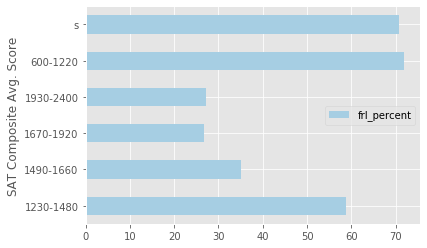

In [513]:
composite_frl = sat_demos.drop(columns=['asian_per', 'black_per', 'hispanic_per', 'white_per']).groupby('SAT Composite Avg. Score').mean().plot.barh(rot=0, colormap='Paired')

The bar plot below demonstrates the average percentage of students who took the SAT test at a given school for each SAT composite score range

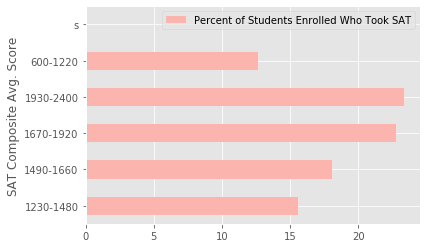

In [571]:
composite_takers = sat_demos.drop(columns=['frl_percent','asian_per', 'black_per', 'hispanic_per', 'white_per']).groupby('SAT Composite Avg. Score').mean().plot.barh(rot=0, colormap='Pastel1')

### SAT Critical Reading Scores & Ethnicity

In [572]:
sat_demos.groupby('SAT Critical Reading Avg. Score').mean()

,Percent of Students Enrolled Who Took SAT,frl_percent,asian_per,black_per,hispanic_per,white_per
SAT Critical Reading Avg. Score,,,,,,
200-400,12.803793,71.958621,5.813448,43.325862,46.954138,3.218276
410-490,15.217347,57.834694,14.936735,33.095918,37.158163,13.934694
500-550,18.145455,31.800000,21.890909,16.790909,21.545455,37.190909
560-640,22.983333,26.933333,36.333333,10.966667,13.958333,37.183333
650-800,25.200000,30.300000,72.100000,1.200000,2.400000,23.700000
s,0.000000,70.865789,9.036842,33.213158,50.044737,6.878947


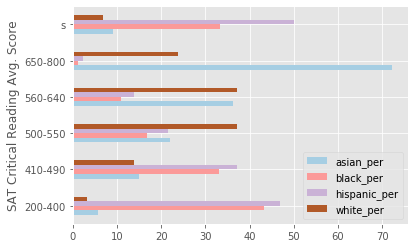

In [574]:
reading_eth = sat_demos.drop(columns=['frl_percent', 'Percent of Students Enrolled Who Took SAT']).groupby('SAT Critical Reading Avg. Score').mean().plot.barh(rot=0, colormap = 'Paired')

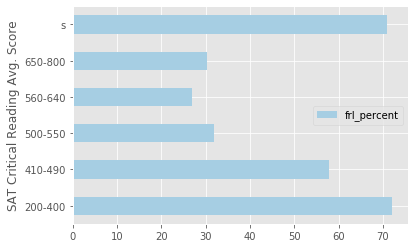

In [575]:
reading_frl = sat_demos.drop(columns=['asian_per', 'black_per', 'hispanic_per', 'white_per', 'Percent of Students Enrolled Who Took SAT']).groupby('SAT Critical Reading Avg. Score').mean().plot.barh(rot=0, colormap = 'Paired')

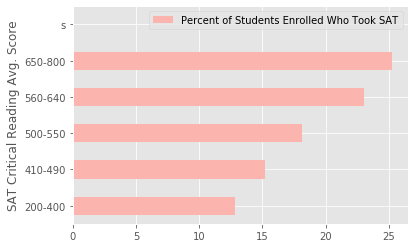

In [576]:
reading_takers = sat_demos.drop(columns=['frl_percent','asian_per', 'black_per', 'hispanic_per', 'white_per']).groupby('SAT Critical Reading Avg. Score').mean().plot.barh(rot=0, colormap='Pastel1')

### SAT Math Scores & Ethnicity

In [577]:
sat_demos.groupby('SAT Math Avg. Score').mean()

,Percent of Students Enrolled Who Took SAT,frl_percent,asian_per,black_per,hispanic_per,white_per
SAT Math Avg. Score,,,,,,
200-410,12.462545,71.895273,4.010545,46.190909,46.430182,2.654545
420-510,15.567890,59.252294,15.302752,28.460550,41.014679,14.329358
520-570,18.733333,39.453333,35.280000,13.566667,18.513333,31.126667
580-670,22.980000,33.610000,43.110000,11.140000,13.360000,30.870000
680-800,23.366667,27.166667,55.800000,1.933333,4.966667,36.800000
s,0.000000,70.865789,9.036842,33.213158,50.044737,6.878947


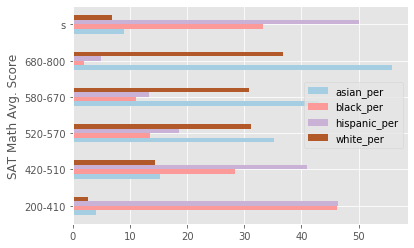

In [578]:
math_eth = sat_demos.drop(columns=['frl_percent', 'Percent of Students Enrolled Who Took SAT']).groupby('SAT Math Avg. Score').mean().plot.barh(rot=0, colormap = 'Paired')

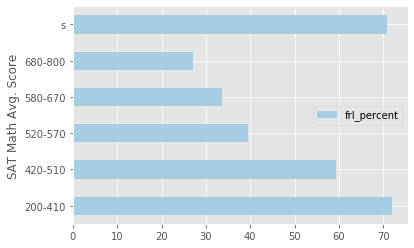

In [579]:
math_frl = sat_demos.drop(columns=['asian_per', 'black_per', 'hispanic_per', 'white_per', 'Percent of Students Enrolled Who Took SAT']).groupby('SAT Math Avg. Score').mean().plot.barh(rot=0, colormap = 'Paired')

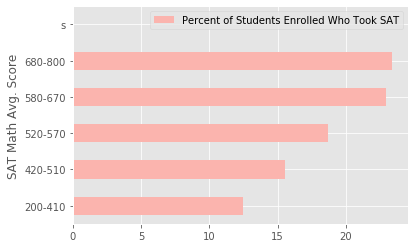

In [580]:
math_takers = sat_demos.drop(columns=['frl_percent','asian_per', 'black_per', 'hispanic_per', 'white_per']).groupby('SAT Math Avg. Score').mean().plot.barh(rot=0, colormap='Pastel1')

### SAT Writing Scores & Ethnicity

In [581]:
sat_demos.groupby('SAT Writing Avg. Score').mean()

,Percent of Students Enrolled Who Took SAT,frl_percent,asian_per,black_per,hispanic_per,white_per
SAT Writing Avg. Score,,,,,,
200-390,12.734276,71.807067,6.128622,44.093993,45.910954,3.182686
400-480,15.185294,59.524510,12.780392,32.328431,41.178431,12.827451
490-550,17.250000,35.991667,24.258333,15.983333,22.250000,35.225000
550-640,22.864286,27.428571,35.528571,11.164286,14.478571,37.314286
650-800,25.200000,30.300000,72.100000,1.200000,2.400000,23.700000
s,0.000000,70.865789,9.036842,33.213158,50.044737,6.878947


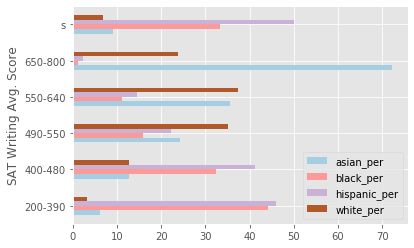

In [582]:
writing_eth = sat_demos.drop(columns=['frl_percent', 'Percent of Students Enrolled Who Took SAT']).groupby('SAT Writing Avg. Score').mean().plot.barh(rot=0, colormap = 'Paired')

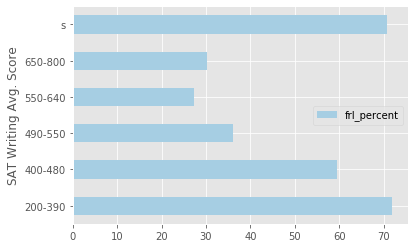

In [583]:
writing_frl = sat_demos.drop(columns=['asian_per', 'black_per', 'hispanic_per', 'white_per', 'Percent of Students Enrolled Who Took SAT']).groupby('SAT Writing Avg. Score').mean().plot.barh(rot=0, colormap = 'Paired')

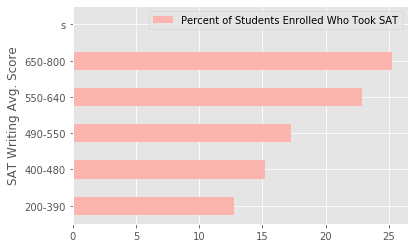

In [584]:
writing_takers = sat_demos.drop(columns=['frl_percent','asian_per', 'black_per', 'hispanic_per', 'white_per']).groupby('SAT Writing Avg. Score').mean().plot.barh(rot=0, colormap='Pastel1')

In [900]:
#add the raw scores back to the dataframe
sat_raws_demos = pd.merge(pd.read_csv('sat_ny.csv'), demos, on = 'DBN', how = 'inner')
composites_raw = []
for i, row in sat_raws_demos.iterrows():
    n = row['Num of SAT Test Takers']
    if n == 's':
        composites_raw.append(0)
        continue
    r = int(row['SAT Critical Reading Avg. Score'])
    m = int(row['SAT Math Avg. Score'])
    w = int(row['SAT Writing Avg. Score'])
    c = r+m+w
    composites_raw.append(c)
sat_raws_demos['SAT Composite Avg. Score'] = composites_raw
sat_raws_demos = sat_raws_demos.loc[sat_raws_demos['SAT Composite Avg. Score'] > 0]

To get an idea of what the distribution of SAT score should look like for all schools, despite demographics, I used the 2012 nationwide mean and standard deviation for rising seniors' SAT composite scores (https://secure-media.collegeboard.org/digitalServices/pdf/research/SAT-Percentile-Ranks-Composite-CR-M-W-2012.pdf).
This histogram below is a rough "normal" distribution of this. I will use this histogram to see if there are significant differences between the distributions of predominantly Asian/White schools and predominantly Black/Hispanic schools.

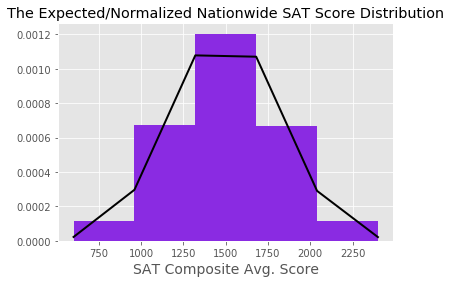

In [1119]:
sd = 316
mean = 1498
normal_composite = np.random.normal(mean, sd, 1000000)
counts, bins, ignored = plt.hist(normal_composite, 5, (600, 2400), density=True, color='blueviolet')
x = 1/(sd * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * sd**2)) 
plt.plot(bins, x, color='black', linewidth = 2)
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.title("The Expected/Normalized Nationwide SAT Score Distribution")
plt.show()           

In [1103]:
sat_raws_black_hispanic = list(sat_raws_demos.loc[sat_raws_demos['black_per'] + sat_raws_demos['hispanic_per'] >= 50]['SAT Composite Avg. Score'])
len(sat_raws_black_hispanic)

353

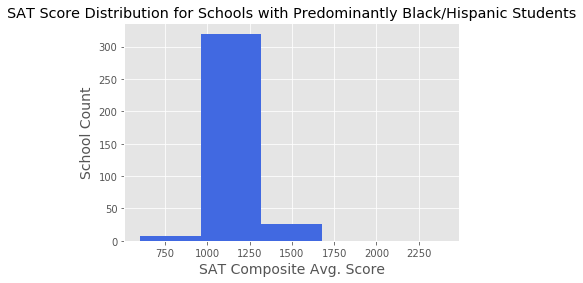

In [1125]:
plt.hist(sat_raws_black_hispanic, 5, (600, 2400), color='royalblue')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("SAT Score Distribution for Schools with Predominantly Black/Hispanic Students")
plt.show()

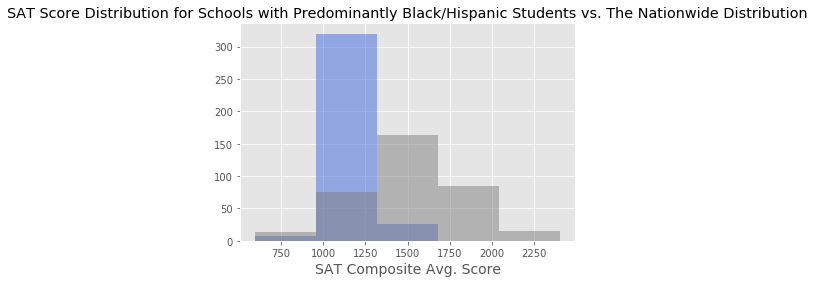

In [1122]:
plt.hist(sat_raws_black_hispanic, 5, (600, 2400), alpha = 0.5, color='royalblue')
plt.hist(np.random.normal(mean, sd, len(sat_raws_black_hispanic)), 5, (600, 2400), alpha = 0.5, color='gray')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.title("SAT Score Distribution for Schools with Predominantly Black/Hispanic Students vs. The Nationwide Distribution")
plt.show()

In [940]:
sat_raws_white_asian = list(sat_raws_demos.loc[sat_raws_demos['white_per'] + sat_raws_demos['asian_per'] >= 50]['SAT Composite Avg. Score'])

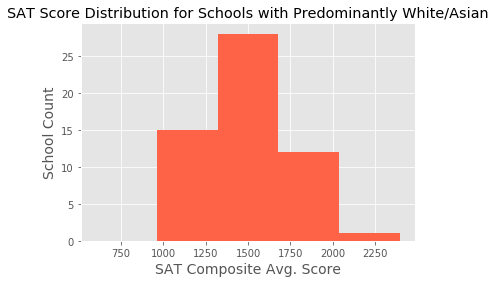

In [1124]:
plt.hist(sat_raws_white_asian, 5, (600, 2400), color='tomato')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("SAT Score Distribution for Schools with Predominantly White/Asian")
plt.show()

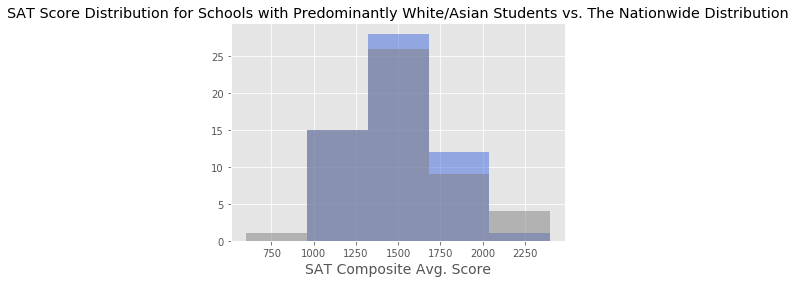

In [1126]:
plt.hist(sat_raws_white_asian, 5, (600, 2400), alpha = 0.5, color='royalblue')
plt.hist(np.random.normal(mean, sd, len(sat_raws_white_asian)), 5, (600, 2400), alpha = 0.5, color='gray')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.title("SAT Score Distribution for Schools with Predominantly White/Asian Students vs. The Nationwide Distribution")
plt.show()

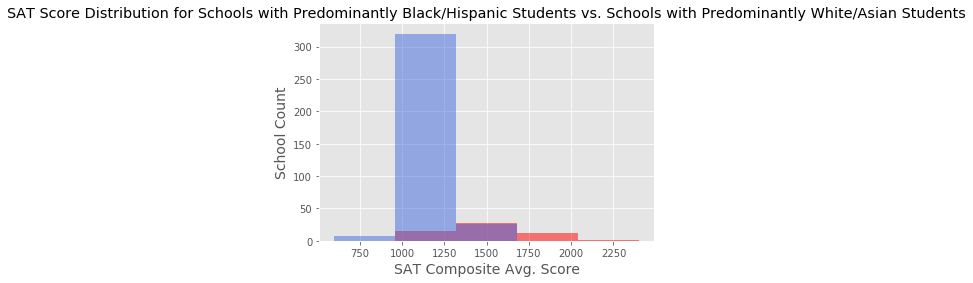

In [1127]:
plt.hist(sat_raws_white_asian, 5, (600, 2400), alpha = 0.5, color='red')
plt.hist(sat_raws_black_hispanic, 5, (600, 2400), alpha = 0.5, color='royalblue')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("SAT Score Distribution for Schools with Predominantly Black/Hispanic Students vs. Schools with Predominantly White/Asian Students")
plt.show()

The below scatterplots show any association between a school's average SAT composite score and the percent of a given ethnic group and the corresponding correlation value. 

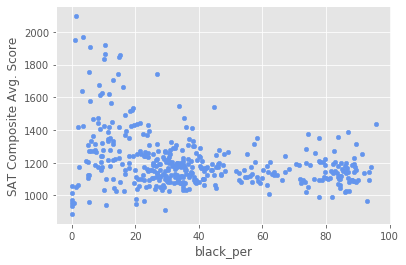

In [906]:
sat_raws_black = sat_raws_demos.loc[:, sat_raws_demos.columns.intersection(['black_per', 'SAT Composite Avg. Score'])]
sat_raws_black.plot.scatter(x='black_per', y='SAT Composite Avg. Score', c='cornflowerblue')

In [902]:
sat_raws_black_corr = sat_raws_black['black_per'].corr(sat_raws_black['SAT Composite Avg. Score'])
sat_raws_black_corr

-0.3103191741348346

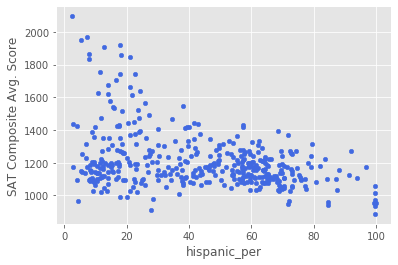

In [907]:
sat_raws_hisp = sat_raws_demos.loc[:, sat_raws_demos.columns.intersection(['hispanic_per', 'SAT Composite Avg. Score'])]
sat_raws_hisp.plot.scatter(x='hispanic_per', y='SAT Composite Avg. Score', c='royalblue')

In [908]:
sat_raws_hisp_corr = sat_raws_hisp['hispanic_per'].corr(sat_raws_hisp['SAT Composite Avg. Score'])
sat_raws_hisp_corr

-0.36311809045341775

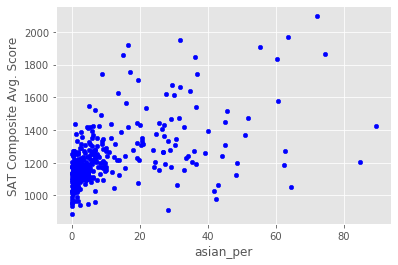

In [909]:
sat_raws_asian = sat_raws_demos.loc[:, sat_raws_demos.columns.intersection(['asian_per', 'SAT Composite Avg. Score'])]
sat_raws_asian.plot.scatter(x='asian_per', y='SAT Composite Avg. Score', c='blue')

In [910]:
sat_raws_asian_corr = sat_raws_asian['asian_per'].corr(sat_raws_asian['SAT Composite Avg. Score'])
sat_raws_asian_corr

0.5453736367894154

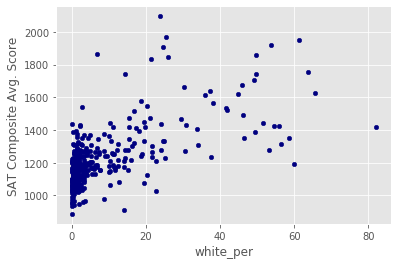

In [911]:
sat_raws_white = sat_raws_demos.loc[:, sat_raws_demos.columns.intersection(['white_per', 'SAT Composite Avg. Score'])]
sat_raws_white.plot.scatter(x='white_per', y='SAT Composite Avg. Score', c='navy')

In [912]:
sat_raws_white_corr = sat_raws_white['white_per'].corr(sat_raws_white['SAT Composite Avg. Score'])
sat_raws_white_corr

0.6519271937535859

While the associations between an ethnic group's percent of population and average SAT Composite score for a given New York school seem to be fairly week, the below scatter plot demonstrates that schools with more students in a lower socioeconomic class (as measured by percent of students who receive free/reduce price lunches) are associated with scoring lower on average on the SAT.

### SAT Scores vs. Schools' Socioeconomic Status

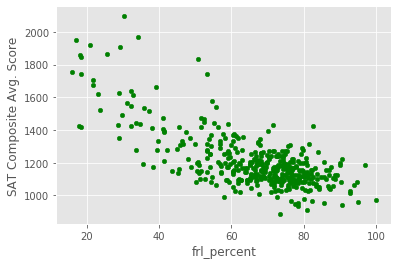

In [915]:
sat_raws_frl = sat_raws_demos.loc[:, sat_raws_demos.columns.intersection(['frl_percent', 'SAT Composite Avg. Score'])]
sat_raws_frl.plot.scatter(x='frl_percent', y='SAT Composite Avg. Score', c='green')

In [916]:
sat_raws_frl_corr = sat_raws_frl['frl_percent'].corr(sat_raws_frl['SAT Composite Avg. Score'])
sat_raws_frl_corr

-0.72110326583535

In [1086]:
frl_median = np.median(np.array(list(sat_raws_frl['frl_percent'])))
sat_raws_frls = np.array(list(sat_raws_frl['SAT Composite Avg. Score']))
sat_raws_frl_lower = np.array(list(sat_raws_frl.loc[sat_raws_frl['frl_percent'] < frl_median]['SAT Composite Avg. Score']))
sat_raws_frl_higher = np.array(list(sat_raws_frl.loc[sat_raws_frl['frl_percent'] >= frl_median]['SAT Composite Avg. Score']))

In [1128]:
frl_mean = np.mean(np.array(list(sat_raws_frl['frl_percent'])))
frl_median, frl_mean

(69.69999999999999, 66.11432038834951)

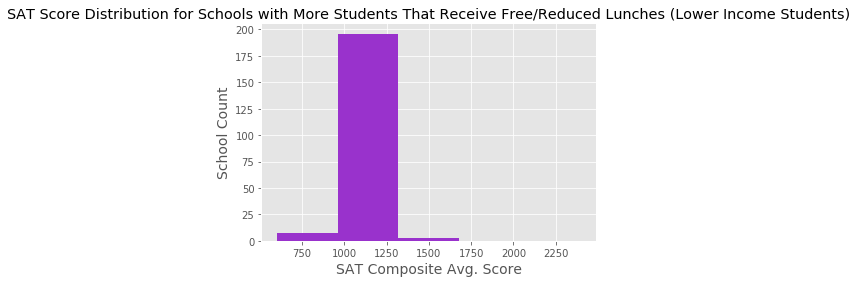

In [1129]:
plt.hist(sat_raws_frl_higher, 5, (600, 2400), color='darkorchid')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("SAT Score Distribution for Schools with More Students That Receive Free/Reduced Lunches (Lower Income Students)")
plt.show()

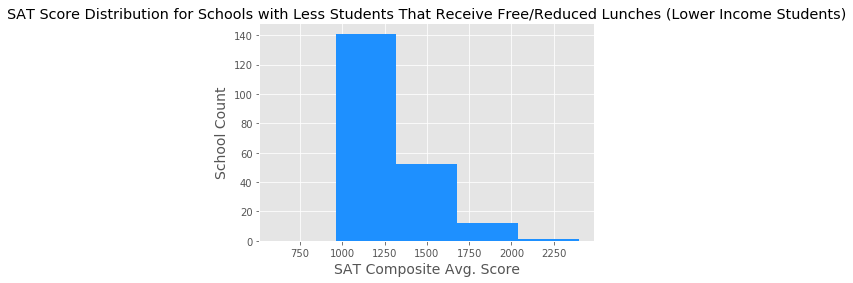

In [1130]:
plt.hist(sat_raws_frl_lower, 5, (600, 2400), color='dodgerblue')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("SAT Score Distribution for Schools with Less Students That Receive Free/Reduced Lunches (Lower Income Students)")
plt.show()

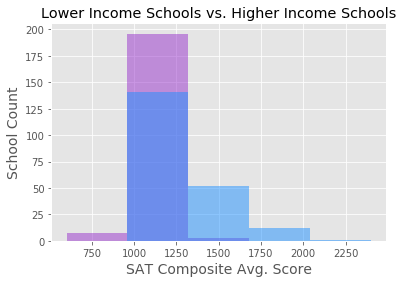

In [1131]:
plt.hist(sat_raws_frl_higher, 5, (600, 2400), alpha=0.5, color='darkorchid')
plt.hist(sat_raws_frl_lower, 5, (600, 2400), alpha=0.5, color='dodgerblue')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("Lower Income Schools vs. Higher Income Schools")
plt.show()

Another way to look at how socioeconomic class and SAT scores is to look at school's data by the schools' boroughs (Manhattan, Brooklyn, Bronx, Queens, and Staten Island). The letters in the school's DBN (unique identifier) indicate which borough/county it is located in. M is for Manhattan County/Borough, K is for Kings County (Brooklyn), X is for Bronx County/Borough, Q is for Queens County/Borough, and R is for Richmond County (Staten Island).

According to the census data (https://www.census.gov/quickfacts/fact/table/newyorkcountymanhattanboroughnewyork,bronxcountybronxboroughnewyork,queenscountyqueensboroughnewyork,kingscountybrooklynboroughnewyork,richmondcountystatenislandboroughnewyork,newyorkcitynewyork/HSG010219), based on median household income in 2018 dollars (2014-2018), the boroughs are ranked in from highest to lowest median househould income as below:
1. Manhattan
2. Staten Island
3. Queens
4. Brooklyn
5. Bronx

I will look at schools from each borough, create histograms for each, and compare them to the nationwide estimated score distribution (based on nationwide average and standard deviation).

In [1029]:
scores = []
m_scores = []
r_scores = []
q_scores = []
k_scores = []
x_scores = []
no_m_scores = []
no_r_scores = []
no_q_scores = []
no_k_scores = []
no_x_scores = []
for i, row in sat_raws_demos.iterrows():
    dbn = row['DBN']
    score = row['SAT Composite Avg. Score']
    scores.append(score)
    if 'M' in dbn:
        m_scores.append(score)
        no_r_scores.append(score)
        no_q_scores.append(score)
        no_k_scores.append(score)
        no_x_scores.append(score)
    elif 'Q' in dbn:
        q_scores.append(score)
        no_r_scores.append(score)
        no_m_scores.append(score)
        no_k_scores.append(score)
        no_x_scores.append(score)
    elif 'K' in dbn:
        k_scores.append(score)
        no_r_scores.append(score)
        no_q_scores.append(score)
        no_m_scores.append(score)
        no_x_scores.append(score)
    elif 'X' in dbn:
        x_scores.append(score)
        no_r_scores.append(score)
        no_q_scores.append(score)
        no_k_scores.append(score)
        no_m_scores.append(score)
    elif 'R' in dbn:
        r_scores.append(score)
        no_m_scores.append(score)
        no_q_scores.append(score)
        no_k_scores.append(score)
        no_x_scores.append(score)
m_scores = np.array(m_scores)
r_scores = np.array(r_scores)
q_scores = np.array(q_scores)
k_scores = np.array(k_scores)
x_scores = np.array(x_scores)
scores = np.array(scores)

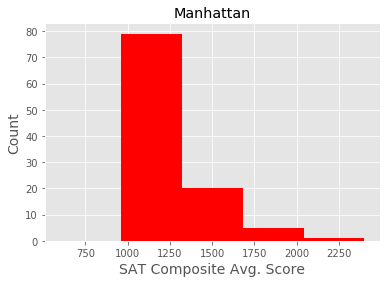

In [1116]:
plt.hist(m_scores, 5, (600, 2400), color='red')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.title("Manhattan")
plt.show()

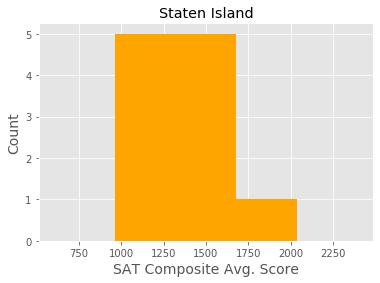

In [1115]:
plt.hist(r_scores, 5, (600, 2400), color='orange')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.title("Staten Island")
plt.show()

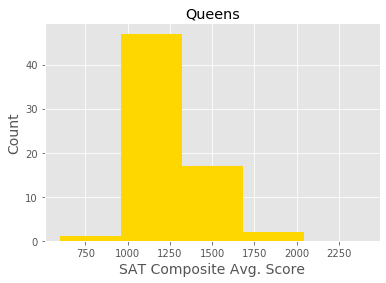

In [1114]:
plt.hist(q_scores, 5, (600, 2400), color='gold')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.title("Queens")
plt.show()

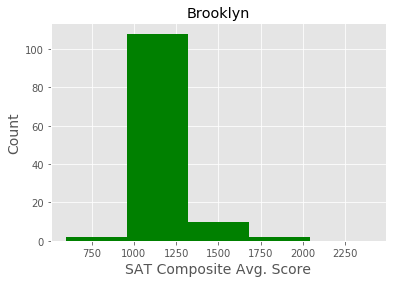

In [1113]:
plt.hist(k_scores, 5, (600, 2400), color='green')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.title("Brooklyn")
plt.show()

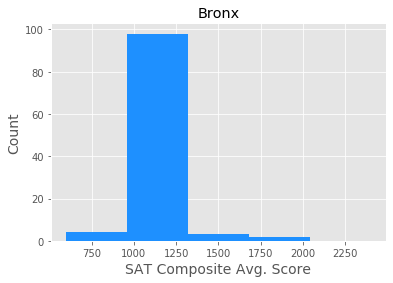

In [1112]:
plt.hist(x_scores, 5, (600, 2400), color='dodgerblue')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.title("Bronx")
plt.show()

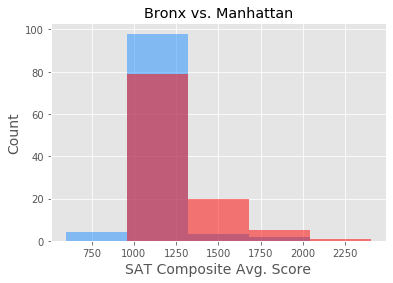

In [1109]:
plt.hist(x_scores, 5, (600, 2400), alpha = 0.5, color='dodgerblue')
plt.hist(m_scores, 5, (600, 2400), alpha = 0.5, color='red')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.title("Bronx vs. Manhattan")
plt.show()

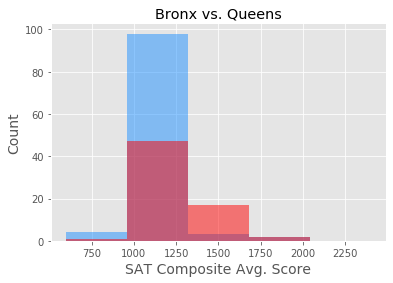

In [1110]:
plt.hist(x_scores, 5, (600, 2400), alpha = 0.5, color='dodgerblue')
plt.hist(q_scores, 5, (600, 2400), alpha = 0.5, color='red')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.title("Bronx vs. Queens")
plt.show()

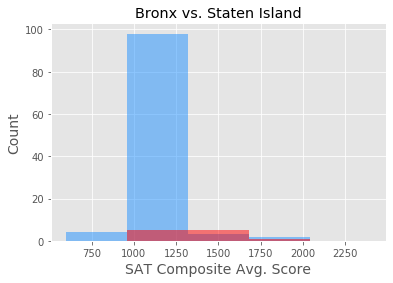

In [1111]:
plt.hist(x_scores, 5, (600, 2400), alpha = 0.5, color='dodgerblue')
plt.hist(r_scores, 5, (600, 2400), alpha = 0.5, color='red')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.title("Bronx vs. Staten Island")
plt.show()

When compared to the three richest boroughs, the Bronx's distribution has a more significant left skew than the others. The distributions for Manhattan, Queens, and Staten Island all have a more significant right skew, meaning that more students in these boroughs score higher than students in the Bronx.

Manhattan's histogram has the longest right tail, meaning more of its students scored above average on the SAT. Staten Island's histogram is the only one centered at around 1250-1500 (the average score range), where the others are centered at 1000-1250 (below average). 

All of this information seem to point that the more well of a borough is, the more students score higher on the SAT.

## Conclusion

In analyzing the SAT score data and demographics of New York City public schools, I have found clear associations between ethnicity and socioeconomic status with SAT scores.

Though the correlation values were relatively weak, the fact that higher SAT Scores and percentage of Black or Hispanic students at a school have a NEGATIVE association (lower percentages of Black/Hispanic students, higher SAT Scores) while higher SAT scores and percentage of White or Asian students at a school have a POSITIVE association (higher percentages of White/Asian students, higher SAT scores) demonstrate that the SAT is potentially discrimanatory against certain groups.

The data shows a stronger case for association between SAT scores and socioeconomic status (measured by percentage of students who receive free/reduced price lunches and location of schools). I found a decently strong correlatin value (-0.72) between SAT scores and percentage of students who receive free/reduced price lunches; schools with higher percentages of students who receive free/reduced price lunches are associated with lower SAT scores. Additionally, the score distribution for schools with lower percentages of students who receive free/reduced price lunches had a much larger right tail than the score distribution for schools with higher percentages of students who receive free/reduced price lunches.

The discrepancy of SAT scores a the socioeconomic statuses were shown in looking at the schools by borough. Manhattan, the richest borough, had a distribution that was especially skewed right, meaning more students in Manhattan scored well above average on the SAT. The center of Staten Island's, the second richest borough, distribution was higher than all other boroughs. The Bronx, the poorest borough, has both the largest left tail and the smallest right tail, meaning a greater portion of Bronx students scored lower than any other borough and a smaller portion of Bronx student scored above average than any other borough.

All in all, it is clear that the SAT is not fair for students of all socioeconomic statuses. Such standardized tests are another way that systemic issues regarding wealth and/or race are exacerbated and disadvantage minorities and poorer people. While no causation was proved in this basic analysis, the data demonstrating association between SAT scores and student demographics warrant the need to look into making the SAT less discrimantory, or finding an entirely new way to measure college-readiness.